> # Outline:
>
> 1. BIVARIATE STATISTICAL METHODS
>
>    - Introduction
>    - Covariance
>    - The Correlation Coefficient – Pearson’s Product Moment Coefficient
>    - Variance of Sample Correlation Coefficient, r
>    - Tests of Hypothesis for the Correlation Coefficient
>
>
> 2. Regression Analysis
>
>    - Assumptions Underlying The Regression Model
>    - Simple Linear Regression
>    - Estimating A Simple Regression Model
>    - Evaluating The Model
>    - The Coefficient of Determination (R2)
>    - The Standard Error (Root Mean Squared Error) of the Regression,  
>    - Testing The Significance Of The Independent Variable
>    - Testing The Overall Significance Of The Model
>    - Testing The Overall Significance Of The Model
>    - Functional Forms Of The Regression Model
>
>
> 2. ***Using R***
>
>
>  - Using R for Correlation and Simple Linear Regression Modelling
>
>
> **Accompanying Workshop - done in week 12**
>
>  - Regression Examples
>
> **Workshop for week 10/11**
>
>  - Based on lectures in week 9/10
>  - Help with Assignment 2
>
> **Project Requirements for Week 10**
>
> - Assignment 2 is available on Learning@Griffith. It is due in week 12.

# 1. BIVARIATE STATISTICAL METHODS

## 1.1 Introduction

When research involves more than one measurement on each experimental unit the resulting
data are said to be multivariate, there is more than one variable. The simplest case occurs
when there are just two variables – bivariate data.

With multivariate data two situations may occur:

- the different variables are independent of each other;
- the different variables depend on each other.

When there are dependencies between the variables, any analysis of a single variable should
take into account the impact of the other variable(s). Standard univariate methods of analysis
may lead to misleading results. A second area of difference arises in considering whether or
not there is a causal relationship between the two variables. If there is expected to be a causal relationship – one variable drives or predicts the other – then the correct statistical analysis will be regression analysis. However, when there is not reason to suppose any cause and effect between the two variables, the appropriate statistical analysis is correlation.

### 1.1.1 Covariance

The dispersion or variation in a variable is usually measured by the variance or its square
root, standard deviation. Recall the definition of the population variance for a single variable, say X: 

$$
Var(X) = \frac{1}{n}\sum_{i = 1}^n (X_i - \mu)^2
$$ 


The sample variance is given by: 

$$
S^2 = \frac{1}{n - 1}\sum_{i = 1}^n (X_i - \overline{X})^2
$$ 

A measure of the way in which two variables vary together is given by the covariance which
is defined as: 

$$
Cov(X_1, X_2) = \frac{1}{n}\sum_{i = 1}^n (X_{1_{i}} - \mu_1)(X_{2_{i}} - \mu_2)
$$

with the sample covariance being: 

$$
Cov(X_1, X_2) = \frac{1}{n - 1}\sum_{i = 1}^n (X_{1_{i}} - \overline{X}_1)(X_{2_{i}} - \overline{X}_2)
$$

One of the classical bivariate situations involves a bivariate normal – the two variables have a joint normal distribution. The theory for this is beyond the scope of this course but the
following illustrates the graph of a bivariate normal distribution.

In [1]:
# install.packages(c("mvtnorm", "plotly"))

library(mvtnorm)
library(plotly)

x <- seq(-3, 3, 0.1)
x <- expand.grid(x, x)

test <- dmvnorm(x)

graph <- plot_ly(x = ~ x$Var1, y = ~ x$Var2, z = ~ test, type = 'mesh3d')

graph <- graph %>% layout(
  title = "Interactive 3D Mesh Plot: Standard Bivariate Normal Density",
  scene = list(
    xaxis = list(title = "X1"),
    yaxis = list(title = "X2"),
    zaxis = list(title = "Prob")
  ))

graph



ERROR: Error in library(plotly): there is no package called ‘plotly’


The bivariate observations, $(x_{1_{i}} , x_{2_{i}})$ are said to be $N((\mu_1, \mu_2), (\sigma_1, \sigma_2, \rho_{12}))$ where $\rho_{12}$ is a
function of the covariance (known as the correlation) between the two variables.

### 1.1.2 The Correlation Coefficient – Pearson’s Product Moment Coefficient

The covariance is a measure which depends on the scale of the measurements and as such
does not provide any idea of how related the two variables really are. Instead, a measure is
needed which is unitless and which does provide a general idea of the degree of dependence.

One such measure is the Correlation Coefficient. The most well-known correlation coefficient is
the one developed by Karl Pearson in 1896 - the Pearson Product Moment Correlation
Coefficient. It is usually symbolised by the Greek letter ‘rho' ($\rho$) and it achieves its
standardisation by dividing the covariance by the product of the standard deviations of the
two variables. Note that we use the square roots of the variances so that the unitless nature of
the coefficient is achieved – the covariance involves each of the original units whereas the
variance by definition involves squares of the original units.

Population Correlation Coefficient:

$$
\rho_{x_{1}x_{2}} = \frac{Cov(X_1, X_2)}{\sqrt{Var(X_1)Var(X_2)}} = \frac{\sum_{i = 1}^n (X_{1_{i}} - \mu_1)(X_{2_{i}} - \mu_2)}{\sum_{i = 1}^n (X_{1_{i}} - \mu_1)^2\sum_{i = 1}^n (X_{2_{i}} - \mu_2)^2}
$$

Sample Correlation Coefficient:

$$
r_{x_{1}x_{2}} = \frac{Cov(X_1, X_2)}{\sqrt{Var(X_1)Var(X_2)}} = \frac{\sum_{i = 1}^n (X_{1_{i}} - \overline{X}_1)(X_{2_{i}} - \overline{X}_2)}{\sum_{i = 1}^n (X_{1_{i}} - \overline{X}_1)^2\sum_{i = 1}^n (X_{2_{i}} - \overline{X}_2)^2}
$$

Working Formula:

$$
r_{x_{1}x_{2}} = \frac{\sum x_1 x_2 - \frac{1}{n} \left( \sum x_1 \sum x_2  \right)}{\sqrt{\left( \sum x_1^2 - \frac{1}{n} \left( \sum x_1 \right)^2 \right) \left( \sum x_2^2 - \frac{1}{n} \left( \sum x_2 \right)^2 \right)}}
$$

Other names for this correlation coefficient are: Simple Correlation Coefficent and Product
Moment Coefficient.

The Pearson Correlation Coefficient lies between –1 and +1. That is,

$$
-1 \leq \rho_{x_{1}x_{2}} \leq 1
$$

A value near zero indicates little or no linear relationship between the two variables; a value
close to –1 indicates a strong negative linear relationship (as one goes up the other comes
down – large values of one variable are associated with small values of the other variable); a
value near +1 indicates a strong positive linear relationship (large values of one variable are
associated with large values of the other variable). The following figures illustrate these ideas.


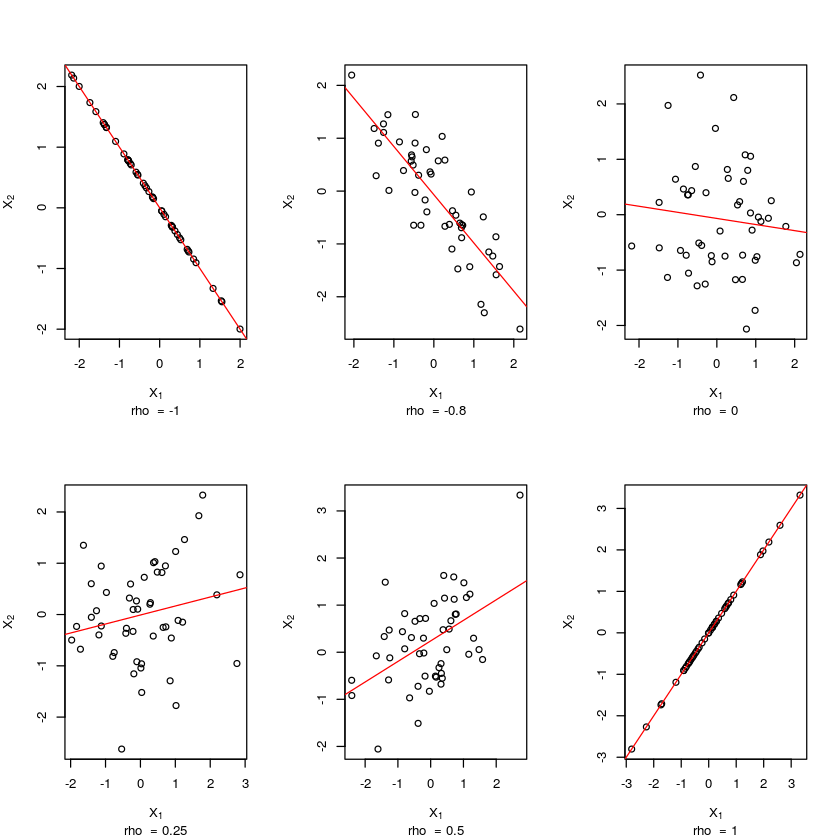

In [10]:
library(MASS)

make.sig <- function(cor, sd1, sd2){
  covar <- cor*sd1*sd2
  sig.mat <- matrix(c(sd1^2, covar, covar, sd2^2), byrow = T, nc = 2)
  sig.mat
}

par(mfrow = c(2, 3))

x <- mvrnorm(50, c(0, 0), make.sig(-1, 1, 1))
plot(x, sub = paste(expression(rho), " = -1"), xlab = expression(X[1]), ylab = expression(X[2]))
abline(lm(x[, 2] ~ x[, 1]), col = "red")

x <- mvrnorm(50, c(0, 0), make.sig(-0.8, 1, 1))
plot(x, sub = paste(expression(rho), " = -0.8"), xlab = expression(X[1]), ylab = expression(X[2]))
abline(lm(x[, 2] ~ x[, 1]), col = "red")

x <- mvrnorm(50, c(0, 0), make.sig(0, 1, 1))
plot(x, sub = paste(expression(rho), " = 0"), xlab = expression(X[1]), ylab = expression(X[2]))
abline(lm(x[, 2] ~ x[, 1]), col = "red")

x <- mvrnorm(50, c(0, 0), make.sig(0.25, 1, 1))
plot(x, sub = paste(expression(rho), " = 0.25"), xlab = expression(X[1]), ylab = expression(X[2]))
abline(lm(x[, 2] ~ x[, 1]), col = "red")

x <- mvrnorm(50, c(0, 0), make.sig(0.5, 1, 1))
plot(x, sub = paste(expression(rho), " = 0.5"), xlab = expression(X[1]), ylab = expression(X[2]))
abline(lm(x[, 2] ~ x[, 1]), col = "red")

x <- mvrnorm(50, c(0, 0), make.sig(1, 1, 1))
plot(x, sub = paste(expression(rho), " = 1"), xlab = expression(X[1]), ylab = expression(X[2]))
abline(lm(x[, 2] ~ x[, 1]), col = "red")

par(mfrow = c(1, 1))

The correlation coefficient measures the linear relationship between two variables. If the
relationship is nonlinear any interpretation of the correlation will be misleading. The following figure
demonstrates this concept.

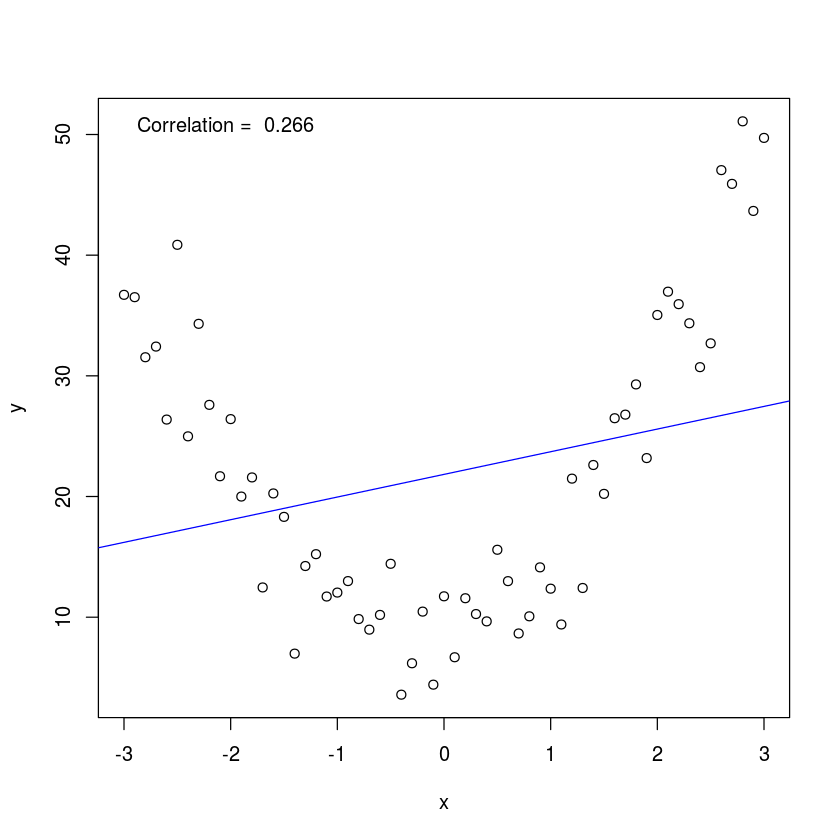

In [22]:
x <- seq(-3, 3, 0.1)
y <- 4*x^2 + 2*x + 10 + rnorm(length(x), 0, 4)

plot(x, y)
abline(lm(y ~ x), col = "blue")
legend("topleft", legend = paste("Correlation = ", round(cor(x, y), 3)), bty = "n")


***Note***

Just because one variable relates to another variable does not mean that changes in one
causes changes in the other. Other variables may be acting on one or both of the related
variables and affecting them in the same direction. Cause-and-effect may be present, but
correlation does not prove cause. For example, the length of a person’s pants and the length
of their legs are positively correlated - people with longer legs have longer pants; but
increasing one’s pants length will not lengthen one’s legs!

***Property of Linearity***

A low correlation (near 0) does not mean that $X_1$ and $X_2$ are not
related in some way. When $|\rho| < \epsilon$ (where $\epsilon$ is some small value, say, for example, 0.1 or 0.2) indicating no or very weak correlation between the two variables, there may still be a definite pattern in the data reflecting a very strong “nonlinear”
relationship (see the previous figure for an example of this). Pearson’s correlation applies only to the strength of linear relationships.



# 2. Regression Analysis

Regression analysis is a technique which develops a mathematical equation that analyses the
relationship between two or more variables, whereby one variable is considered dependent
upon other independent variables. The dependent variable is represented by $Y$, and the
independent variables by $X$.

## 2.1 Assumptions Underlying The Regression Model

For any given value of $X$ there is a distribution of different values of $Y$: the conditional
distribution of $Y$ given the particular $X$ value;

- the mean of the conditional distribution is the true population value of $Y_i$ for the given $X_i$(and therefore lies on the true population regression line); the residual associated with the mean $Y$ value is equal to zero;

- the conditional distribution is approximately normally distributed;

- the variances of the conditional distributions (ie. for each different value of $X$) are equal: homoscedascity;

- each $Y_i$ value is independent of every other (that is, the error terms are not autocorrelated);

- the relationship between the independent and dependent variables can be expressed in linear form (as a straight line);

- there is more than one value of the independent variable, $X$;

- there is no random error in the independent variable, the $X$ values, or any error in the $X$ observations is very much less than the random error in the dependent variable, the $Y$ values.

**Scatterplots**

The relationship between two variables can be graphically presented in a scatterplot. The
dependent variable ($Y$) is on the vertical axis and the independent variable $X$) is on the
horizontal axis. For example, assume the weight of an animal is deemed to be dependent
upon the age of the animal:

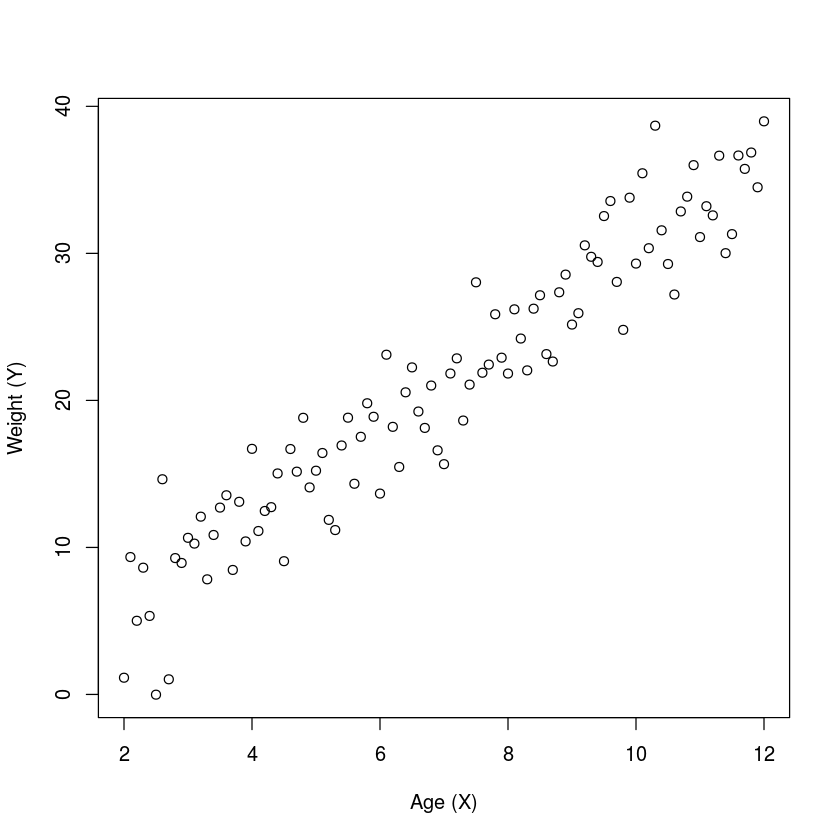

In [25]:
age <- seq(2, 12, 0.1)
weight <- 3*age + rnorm(length(age), 0, 3)

plot(weight ~ age, xlab = "Age (X)", ylab = "Weight (Y)")

## 2.2 Simple Linear Regression

Simple Linear regression is appropriate when a single dependent variable, $Y$, is explained by a
single independent variable, $X$, using a linear relationship. The deterministic form of the
regression model is:

$$
E(Y_i | X_i) = \beta_0 + \beta_1 X_i, \ \ i = 1, \ldots, n.
$$

Because of natural variation in the data (sampling variability), actual relationships will not
fall exactly on the straight line. Hence, in estimating the mathematical model we attempt to
estimate the line of best fit. The line will not be able to pass through all the individual
observations; in fact, the line of best fit may not pass through any of the points. The
difference between the observed point and the estimated line at a particular $X_i$ is known as
the ith error term, $\epsilon_i$.

The population simple regression model is thus:

$$
y_i = \beta_0 + \beta_1 x_i + \epsilon_i, \ \ i = 1, \ldots, n,
$$

where

- $y_i$ is the $Y$ measurement for the individual having an $X$ value of $x_i$;

- $\beta_0$ is a constant representing the y value when x is zero (intercept);

- $\beta_1$ is the slope of the population regression line;

- $\epsilon_i$ is the random error or dispersion or scatter in the $y_i$ observation associated with unknown (excluded) influences.


The sample simple linear regression is:

$$
\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i, \ \ i = 1, \ldots, n,
$$

where symbols with hats (^) denote estimates obtained from sample data.

## 2.3 Estimating A Simple Linear Regression Model

One possible strategy is to choose the line that minimises the sum of squared residuals. In
other words,

$$
\min_{(\beta_0, \beta_1)} \left( \sum_{i = 1}^n \epsilon_i^2 \right) = \min_{(\beta_0, \beta_1)} \left(\sum_{i = 1}^n \left( y_i - \beta_0 - \beta_1 x_i\right)^2 \right)
$$

This method is known as ***ordinary least squares***, or OLS, because it attempts to estimate the
model that minimises the sum of squared errors. The equations for $\beta_0$ and $\beta_1$ that minimise
the sum of squared errors (ie solve the above equation) are:

$$
\hat{\beta}_1 = \frac{n\sum_{i = 1}^n x_i y_i - \left(\sum_{i = 1}^n x_i \right) \left(\sum_{i = 1}^n y_i \right)}{n\sum_{i = 1}^n x_i^2 - \left(\sum_{i = 1}^n x_i \right)^2}
$$

and

$$
\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}.
$$

> **Example:**
>
> Given the following data, estimate the regression equation.
>
> | X   | Y   |
|-----|-----|
| 200 | 180 |
| 250 | 230 |
| 300 | 280 |
| 350 | 310 |
>
>
> $$
\hat{\beta}_1 = \frac{4 \times 286000 - 1100 \times 1000}{4 \times 315000 - 1100^2} = 0.88 \ \ \ \hat{\beta}_0 = 250 - 0.88 \times 275 = 8.00
$$
>
> Therefore, the estimated regression equation (line of best fit through $X$ and $Y$) is:
>
> $$
\hat{y} = 8 + 0.88x
$$

## 2.4 Evaluating The Model

In the regression model it is assumed that changes in the value of $y$ are associated with
changes in the value of $x$. This is only an assumption and may or may not be true. To test
whether $y$ is related linearly to $x$, iwe first imagine that changes in $x$ do not lead to any changes in
$y$. We then test whether the data support this assumption. Under the assumption of “no
effect”, the graph of $Y$ against $X$ would be a horizontal line.

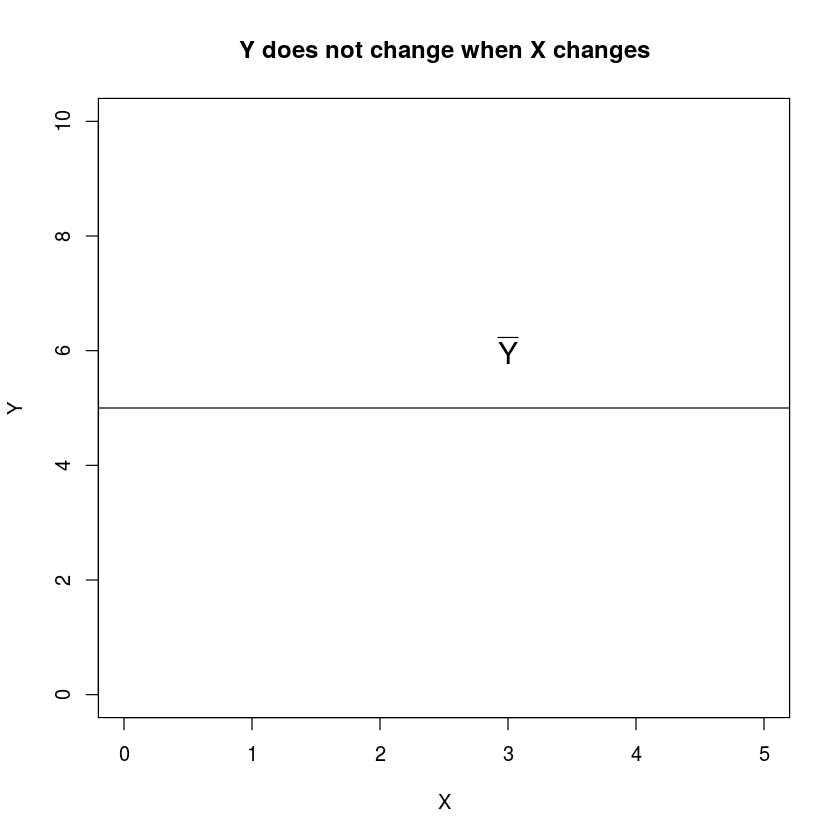

In [8]:
plot(0:5, 2*(0:5), type = "n", xlab = "X", ylab = "Y", main = "Y does not change when X changes")
abline(h = mean(2*(0:5)))
text(3, 6, expression(bar(Y)), cex = 1.5)

Of the total variation of the individual responses from their mean, some will be explained by
the model, and some will be unexplained. Thus the total variation is made up of two
components - the variation explained by the model (or systematic variation) and the variation
left unexplained (error variation).

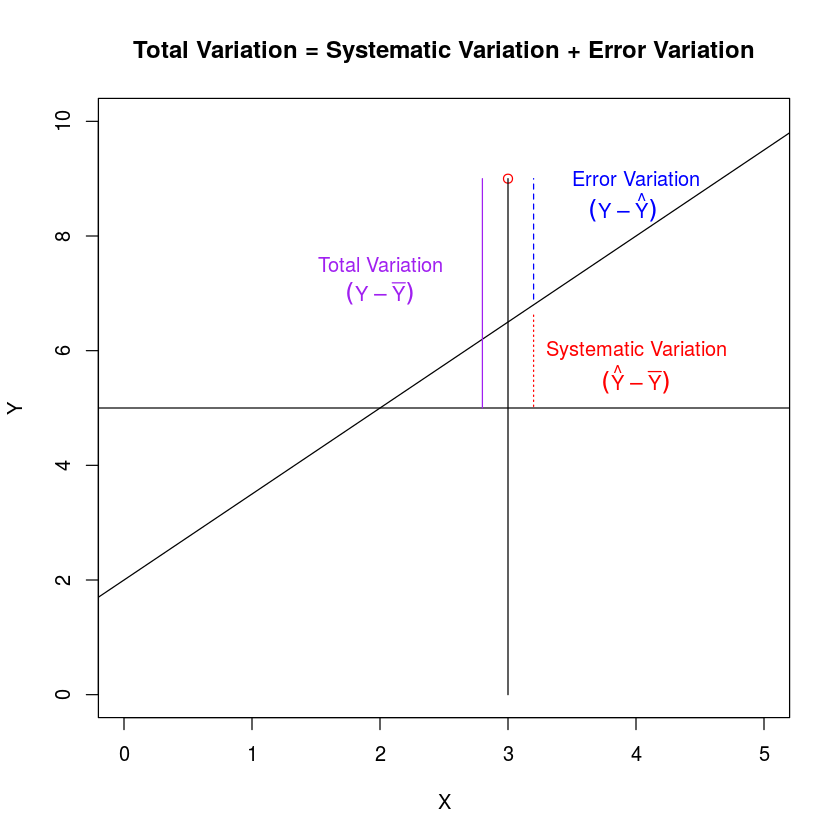

In [41]:
plot(0:5, 2*(0:5), type = "n", xlab = "X", ylab = "Y", main = "Total Variation = Systematic Variation + Error Variation")

ybar <- mean(2*(0:5))
abline(h = ybar)
abline(2, 1.5)

points(3, 9, col = 'red')
lines(c(3, 3), c(0, 9))
lines(c(3.2, 3.2), c(6.9, 9), col = "blue", lty = 2)
lines(c(3.2, 3.2), c(6.62, ybar), col = "red", lty = 3)
lines(c(2.8, 2.8), c(ybar, 9), col = "purple", lty = 1)

text(2, 7.5, "Total Variation", col = "purple")
text(2, 7, expression((Y - bar(Y))), col = "purple")

text(4, 6, "Systematic Variation", col = "red")
text(4, 5.5, expression((hat(Y) - bar(Y))), col = "red")

text(4, 9, "Error Variation", col = "blue")
text(3.9, 8.5, expression((Y - hat(Y))), col = "blue")

## 2.5 The Coefficient of Determination ($R^2$)

The coefficient of determination measures the proportion of variation in the dependent
variable ($y$) that is explained by the model ($x$). Of the total variation in the data, ($Y - \bar{Y}$), the
portion identified by $(\hat{Y} - \bar{Y})$ is explained by the regression model. Thus:

\begin{align*}
R^2 &= \frac{\text{Explained (or systematic) Variation}}{\text{Total Variation}} \\
    &= \frac{\text{Sum of Squares for Regression}}{\text{Total Sum of Squares}} \\
    &= \frac{\sum (\hat{y}_i - \bar{y})^2}{\sum (y_i - \bar{y})^2} \\
    &= \frac{\left( n \sum_{i = 1}^n x_i y_i - \sum_{i = 1}^n x_i \sum_{i = 1}^n y_i \right)^2}{\left[ n \sum_{i = 1}^n x_i^2 - \left( \sum_{i = 1}^n x_i \right)^2  \right] \left[ n \sum_{i = 1}^n y_i^2 - \left( \sum_{i = 1}^n y_i \right)^2  \right]}
\end{align*}

For the example data,

$$
R^2 = \frac{(4 \times 286000 - 1000 \times 1100)^2}{(4 \times 315000 - 1100^2) \times (4 \times 259800 - 1000^2)} = 0.988.
$$

(Note that for simple linear regression $R^2$ is simply the square of the correlation coefficient.)

In other words, 99.8% of the variation in the dependent variable (y) is explained by the
model. But is this significant? What about 60% or 40%? The coefficient of determination
does not give a testable measure of the significance of the model overall in explaining the
variation in (y). Inferences concerning the regression model depend on the standard error or
root mean square error (RMSE) of the model.

## 2.6 The Standard Error (or Root Mean Squared Error) Of The Regression, $\sigma_{\epsilon}$

The standard error of the regression is used as a measure of the dispersion of the observed
points around the regression line. It is the estimate of the standard deviation of the error
variance. A formula for this estimate is:

\begin{align*}
S_{\epsilon} &= \sqrt{\frac{\sum_{i = 1}^n (Y_i - \hat{Y}_i)^2}{n - 2}} \\
             &= \sqrt{\frac{\sum_{i = 1}^n \hat{\epsilon}_i^2}{n-2}} \\
             &= \sqrt{\frac{\text{SSE}}{n-2}}
\end{align*}

A more useable form of the equation is:

$$
S_{\epsilon} = \sqrt{\frac{\sum_{i=1}^n y_i^2 - \hat{\beta}_0 \sum_{i=1}^n y_i - \hat{\beta}_1 \sum_{i=1}^n x_iy_i}{n-2}}
$$

From the previous example:

$$
S_{\epsilon} = \sqrt{\frac{259800 - 8 \times 1000 - 0.88 \times 286000}{4-2}} = 7.7459.
$$



## 2.7 Testing The Significance Of The Independent Variable

To test whether the independent variable $X$ is significant in a simple linear regression model,
we need to test the hypothesis that $\beta_1$ equals zero. If  $\beta_1$ equals zero then the value of $Y$ will
not be affected by any change in $X$ . Therefore the hypotheses are:

\begin{align*}
H_0 &: \beta_1 = 0 \\
H_1 &: \beta_1 \neq 0
\end{align*}

The test statistic for this hypothesis is:

$$
T = \frac{\hat{\beta}_1}{SE(\hat{\beta}_1)}
$$

where

$$
SE(\hat{\beta}_1) = \frac{S_{\epsilon}}{\sqrt{\sum_{i=1}^n x_i^2 - n \bar{x}^2}}
$$

and $\hat{\beta}_1$ denotes the sample estimate of the slope parameter, $\beta_1$.

If the null hypothesis is true, $T$ is approximately distributed as a student’s - $t$ with degrees of
freedom: $df = n - 2$.

Using the previous example again, we can test

\begin{align*}
H_0 &: \beta_1 = 0 \\
H_1 &: \beta_1 \neq 0
\end{align*}

using

$$
SE(\hat{\beta}_1) = \frac{7.7459}{\sqrt{315000 - 4 \times 275^2}} = 0.06928,
$$

and

$$
T = \frac{0.88}{0.06928} = 12.702.
$$

Degrees of freedom are $4 - 2 = 2$. From $t$ tables, $t_2(0.025) = 4.303$. As $T > 4.303$, reject the null hypothesis at the 0.05 level of significance and conclude that $Y$ has a significant linear relationship with $X$ .

## 2.8 Testing The Overall Significance Of The Model

Testing the overall significance of the model is conducted using ANOVA. Variation in the
data, as already discussed, can be divided into total, explained (in the ANOVA it is termed
regression) and unexplained or error. The ANOVA table is thus:

| Source     | DF &nbsp; &nbsp; &nbsp; &nbsp;         | Sum of Squares  &nbsp; &nbsp; &nbsp; &nbsp;  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  | Mean Square &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;   &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;   | Variance Ratio    |
|:------------|:----|:---------|:---------|:-------|
| Regression | $k - 1$  | $SSR = \sum(\hat{y}_i - \bar{y})^2$ | $MSR = SSR/(k - 1)$  | $MSR/MSE$ |
| Error      | $n - k$ |$SSE = \sum(y_i - \hat{y}_i)^2 $ |  $MSE = SSE/(n - k)$|       |
| Total      | $n - 1$ | $TSS = \sum(y_i - \bar{y})^2$ |         |       |

$$TSS = SSR + SSE$$

***NB:*** $k$ is the number of parameters estimated in the model. For simple linear regression, there are two parameters estimated ($\beta_0$ and $\beta_1$), so $k = 2$.

**Notes:**

- the purpose of the ANOVA is to break up the variation in $y$ and (in simple regression) can also test $H_0 : \beta_1 = 0$, and show how the coefficient of determination ($R^2$) is derived.

- based on F-test statistic defined as the variance ratio.

- main question: "Is the ratio of the explained variance (MSR) to the unexplained variance (MSE) sufficiently greater than 1, to reject $H_0$ that $y$ is unrelated to $x$?"

- if we reject $H_0$ the main conclusion is:
   - the linear model explains a part of the variation in $y$. We accept that $x$ and $y$ are linearly related (at the given level of significance).



## 2.9 Predictions Using The Regression Model

Two types of predictions are of interest - one involving an actual prediction, and the other a
conditional average. Both predictions have the same midpoint (or point estimate) but
different confidence intervals.

For predicting the actual value for a conditional mean $E(Y_i | x_i )$, the
standard error of the prediction is given as:

$$
s^2_{y_{p}} = s_{\epsilon}^2 \left(\frac{1}{n} + \frac{(x_{p} - \bar{x})^2}{\sum_{i = 1}^n x_i^2 - n\bar{x}^2}  \right)
$$

where $x_p$ denotes the value of $x$ we are interested in predicting the $y$ value for. This interval is sometimes called the “narrow” interval, or “confidence” interval in R.

Whereas for predictions of actual values of $Y$ from values of $x_i$:

$$
s^2_{y_{p}} = s_{\epsilon}^2 \left(1 + \frac{1}{n} + \frac{(x_{p} - \bar{x})^2}{\sum_{i = 1}^n x_i^2 - n\bar{x}^2}  \right)
$$

This interval is sometimes called the “wide” interval, or “prediction” interval in R.

## 2.10 Functional Forms Of The Regression Model

The form of the relationship between two variables may not be linear. If the relationship
between two variables is not linear then the data either has to be transformed in some manner,
or non-linear regression must be used (non-linear regression is beyond the scope of this
course and will not be discussed here). 

There are many transformations that can be used in regression modelling - some will help to linearise a non-linear relationship; some do other things (eg stabilise the variance). One common transformation is the (natural) logarithmic transformation. 

E.g.:

$$
y_i = e^{\beta_0 + \epsilon_i}x_i^{\beta_1}
$$

becomes 

$$
\ln(y_i) = \beta_0 + \beta_1\ln(x_i) + \epsilon_i
$$

under a natrual log transformation of both $y_i$ and $x_i$.



# 3. Using R and Examples:

## 3.1 House prices and distance from an abattoir

You should try to run a simple regression on this data (during your own time) and get the
following output.

| Distance to Abattoir (km) | House Price ($000s |
|---------------------------|--------------------|
| 1.2                       | 101                |
| 0.8                       | 92                 |
| 1                         | 110                |
| 1.3                       | 120                |
| 0.7                       | 90                 |
| 0.3                       | 51                 |
| 1                         | 93                 |
| 0.6                       | 75                 |
| 0.9                       | 77                 |
| 1.1                       | 120                |

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
distance,1,3289.8988,3289.8988,30.07903,0.0005843856
Residuals,8,875.0012,109.3752,NA,NA



Call:
lm(formula = price ~ distance, data = house.prices)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.5377  -6.2549   0.7738   8.1221  13.7083 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    36.14      10.86   3.327 0.010431 *  
distance       63.77      11.63   5.484 0.000584 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.46 on 8 degrees of freedom
Multiple R-squared:  0.7899,	Adjusted R-squared:  0.7636 
F-statistic: 30.08 on 1 and 8 DF,  p-value: 0.0005844


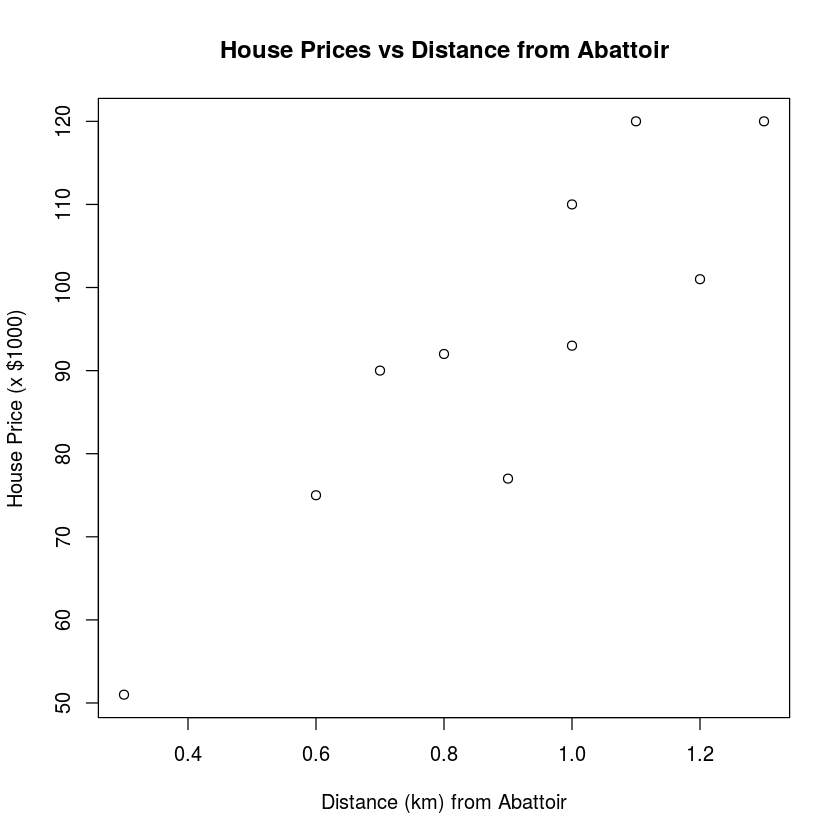

In [43]:
distance <- c(1.2, 0.8, 1, 1.3, 0.7, 0.3, 1, 0.6, 0.9, 1.1)
price <- c(101, 92, 110, 120, 90, 51, 93, 75, 77, 120)
house.prices <- data.frame(distance, price)
rm(distance, price)

attach(house.prices)
plot(x = distance, y = price, xlab = "Distance (km) from Abattoir", ylab = "House Price (x $1000)", main = "House Prices vs Distance from Abattoir")
detach()

house.lm <- lm(price ~ distance, data = house.prices)

# Get the anova table:
anova(house.lm)

# Do the regrssion - get the coefficient estimates (line of best fit estimates) table:
summary(house.lm)

Before we use this model to test hypotheses or make predictions etc, we should first assess
whether the fitted model follows the assumptions of regression modelling. We do this
graphically as follows:

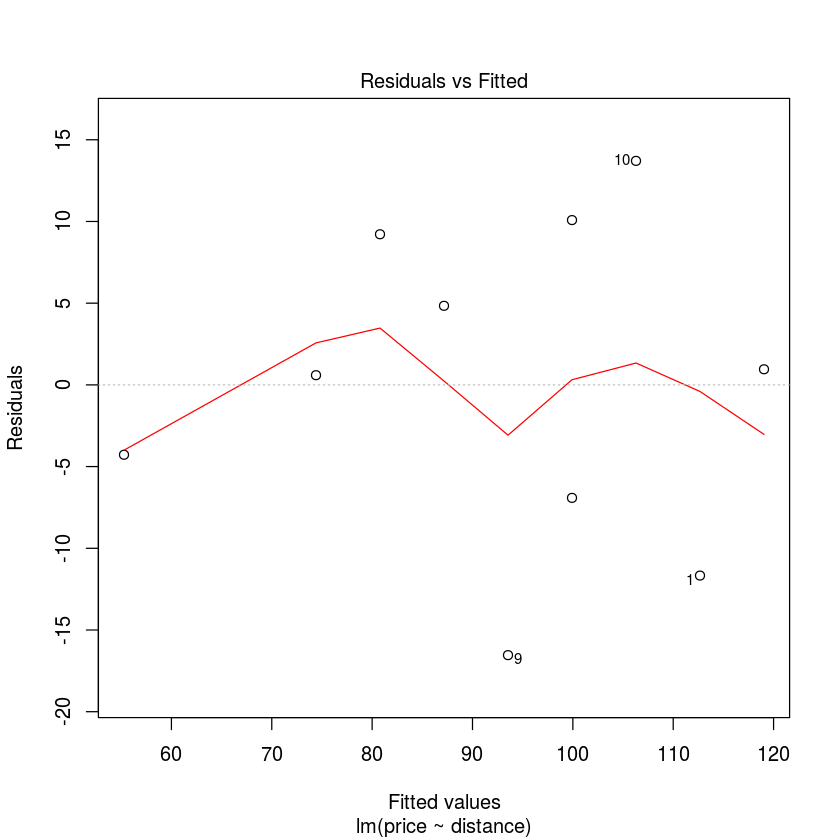

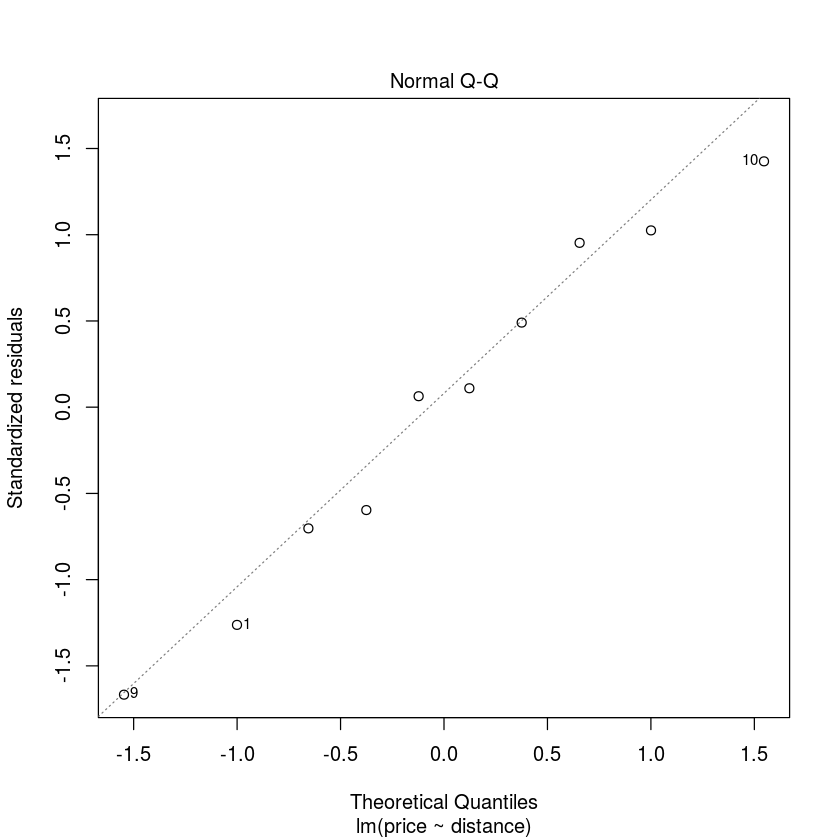

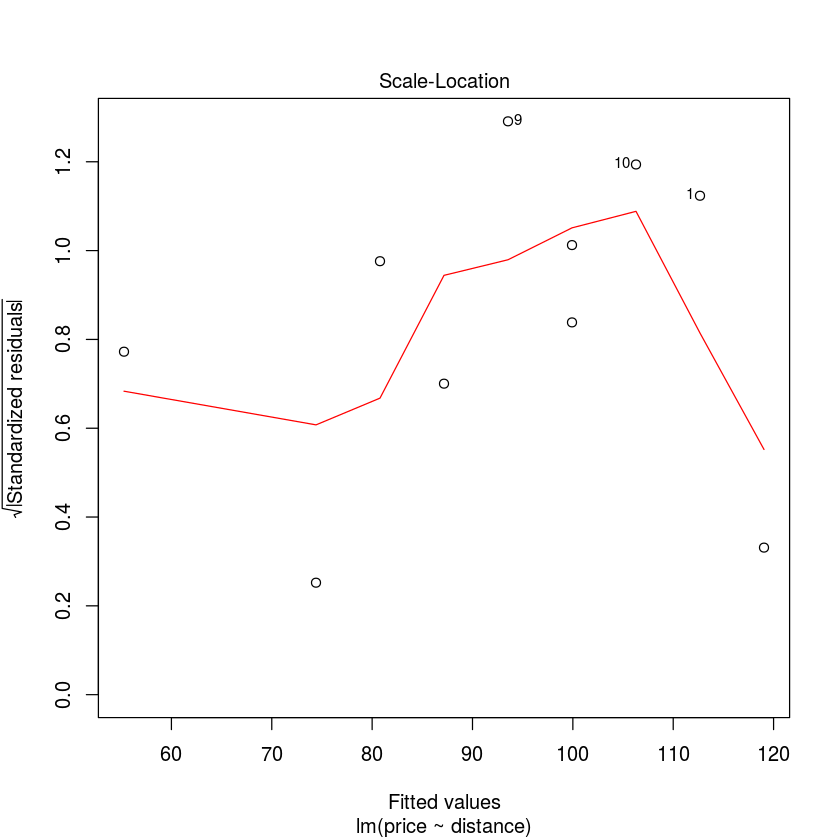

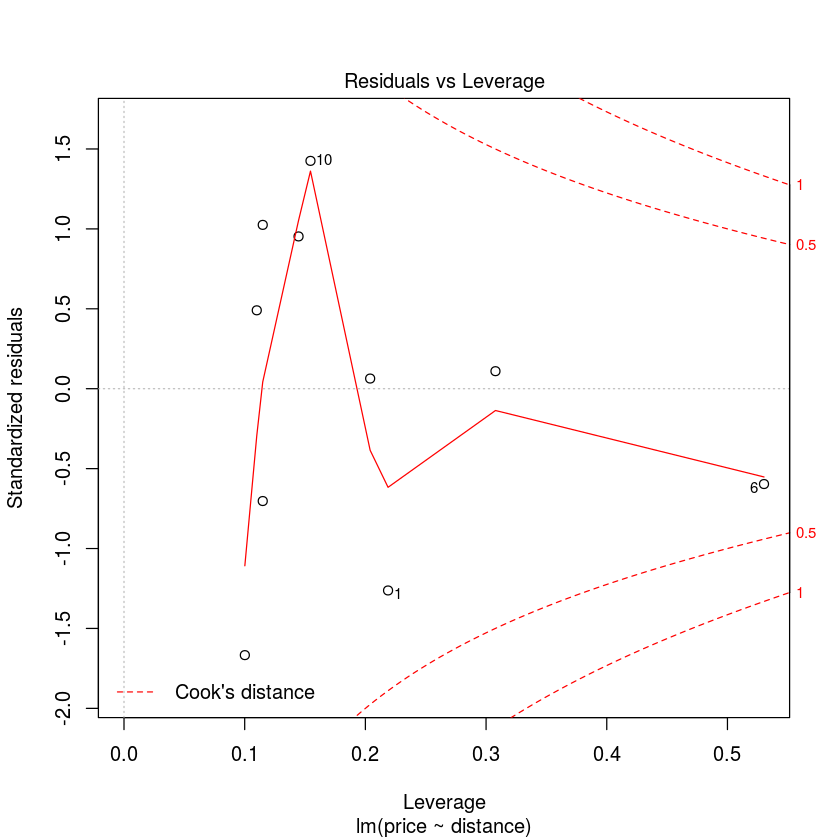

In [44]:
plot(house.lm)

These graphs will be discussed in lectures.

What are the hypotheses and the population regression model for this example?

<br><br><br><br><br>

What is the fitted model for this example?

<br><br><br><br><br>

What would the predicted house price be 0.63 km away from the abattoir?

<br><br><br><br><br>

What would the predicted house price be 2.0 km away from the abattoir?

<br><br><br><br><br>

## 3.2 Bicycle lanes and rider safety

As part of ongoing traffic studies, researchers examined whether bicycle lanes increased rider
safety. Ten roads with bicycle lanes were randomly selected and the distance of these lanes
from the center line measured. The researchers then set up video cameras on each road to
record how close cars were to cyclists as they passed. The data are recorded in the table
below (measurements are in feet).

| Distance to Center Line (Center)   | 12.8 | 12.9 | 12.9 | 13.6 | 14.5 | 14.6 | 15.1 | 17.5 | 19.5 | 20.8 |
|------------------------------------|------|------|------|------|------|------|------|------|------|------|
| Distance from Car to Cyclist (Car) | 5.5  | 6.2  | 6.3  | 7.0  | 7.8  | 8.3  | 7.1  | 10.0 | 10.8 | 11.0 |

The data have been analysed using `lm()` in R and the results are given below.

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
center,1,32.449199,32.4491991,95.76269,9.974851e-06
Residuals,8,2.710801,0.3388501,NA,NA



Call:
lm(formula = car ~ center, data = cyclist)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.76990 -0.44846  0.03493  0.35609  0.84148 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.18247    1.05669  -2.065   0.0727 .  
center       0.66034    0.06748   9.786 9.97e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5821 on 8 degrees of freedom
Multiple R-squared:  0.9229,	Adjusted R-squared:  0.9133 
F-statistic: 95.76 on 1 and 8 DF,  p-value: 9.975e-06


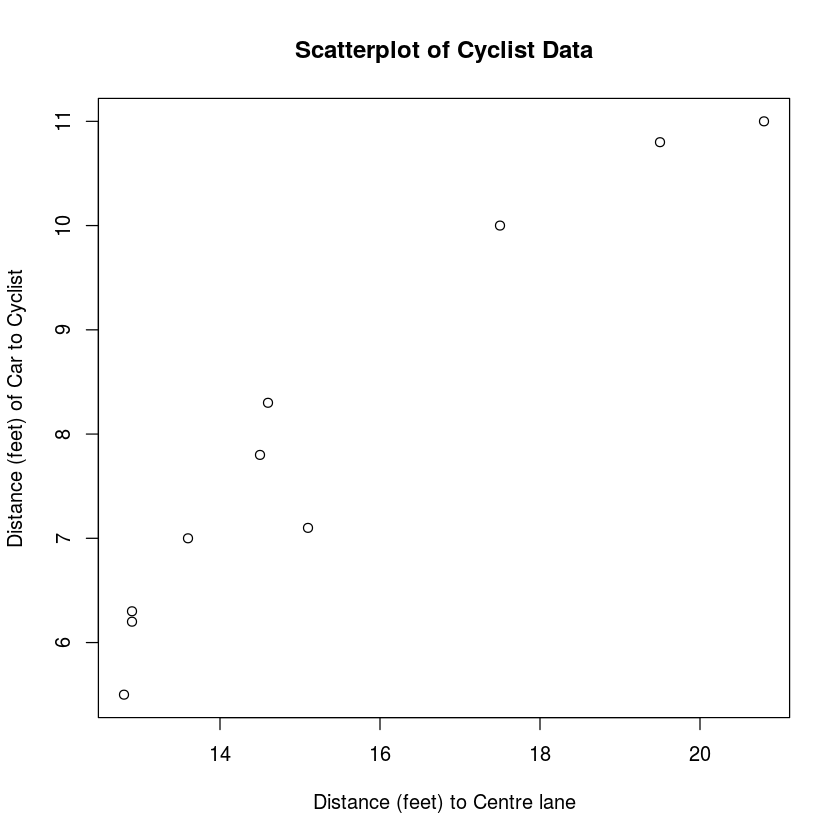

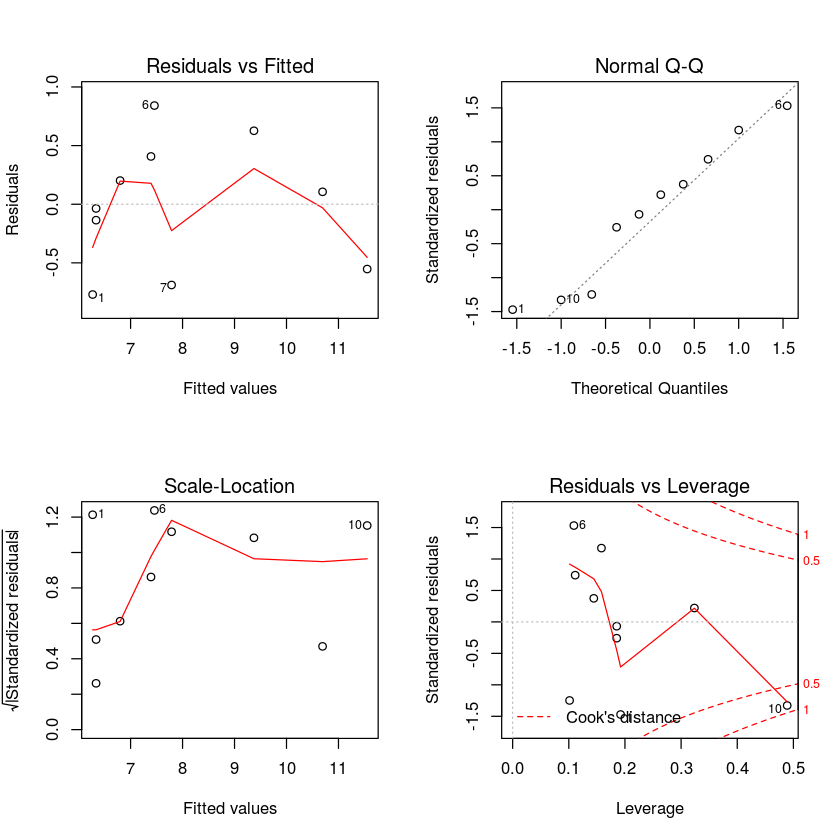

In [47]:
center <- c(12.8, 12.9, 12.9, 13.6, 14.5, 14.6, 15.1, 17.5, 19.5, 20.8)
car <- c(5.5, 6.2, 6.3, 7, 7.8, 8.3, 7.1, 10, 10.8, 11)

cyclist <- data.frame(center, car)
rm(center, car)

# Plot the Data:
attach(cyclist)

plot(center, car, xlab = "Distance (feet) to Centre lane",
     ylab = "Distance (feet) of Car to Cyclist",
     main = "Scatterplot of Cyclist Data")

detach()

# Run the model using lm():

cyclist.lm <- lm(car ~ center, data = cyclist)
anova(cyclist.lm)
summary(cyclist.lm)

# Check model using residual diagnostics:

par(mfrow = c(2, 2))
plot(cyclist.lm)
par(mfrow = c(1, 1))

Hypotheses:<br><br><br><br><br>
Population regression model:<br><br><br><br><br>
Is this model an adequate fit to the data?<br><br><br><br><br>
Why are `Pr(>F)` and `Pr >|t|` for the slope the same?<br><br><br><br><br>
What does the $R^2$ tell us?<br><br><br><br><br>
What is the fitted regression model for the distance a bike lane is from the centre line
(centre) and how close a car passes a cyclist (car).<br><br><br><br><br>
Is there a significant linear relationship between the distance a bike lane is from the
centre line (center) and how close a car passes a cyclist (car) for this data? Explain your
answer.<br><br><br><br><br>
Use the equation of the fitted regression line to predict how much distance a car would
leave when passing a cyclist in a bike lane that is 17 feet from the centre line. Comment
on this prediction.<br><br><br><br><br>
Check your answer to the above prediction using R (see the “Regression Examples – Cycle
Lanes.R” file in the week 10/11 lecture notes folder).

## 3.3 Dissolved Oxygen and Temperature in freshwater rivers

The following data were collected in a study to examine the relationship between dissolved oxygen and temperature in freshwater river systems.

| River                | 1    | 2    | 3    | 4    | 5    | 6    | 7    | 8    | 9    | 10   |
|----------------------|------|------|------|------|------|------|------|------|------|------|
| Dissolved Oxygen (%) | 45.8 | 67.9 | 54.6 | 51.9 | 32.7 | 62.3 | 71.3 | 78.9 | 38.7 | 49.7 |
| Temperature (C)      | 27.9  | 16.5 | 22.3 | 24.8 | 31.2  | 18.5  | 13.1  | 10.7 | 29.1 | 22.1 |

The data have been analyzed using `lm()` in R and the results are given below.

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
temp,1,1880.14011,1880.140109,248.6305,2.615012e-07
Residuals,8,60.49589,7.561986,NA,NA



Call:
lm(formula = DO ~ temp, data = rivers)

Residuals:
   Min     1Q Median     3Q    Max 
-4.671 -1.728  0.468  1.483  3.617 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 100.8129     3.0097   33.50 6.89e-10 ***
temp         -2.1014     0.1333  -15.77 2.62e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.75 on 8 degrees of freedom
Multiple R-squared:  0.9688,	Adjusted R-squared:  0.9649 
F-statistic: 248.6 on 1 and 8 DF,  p-value: 2.615e-07


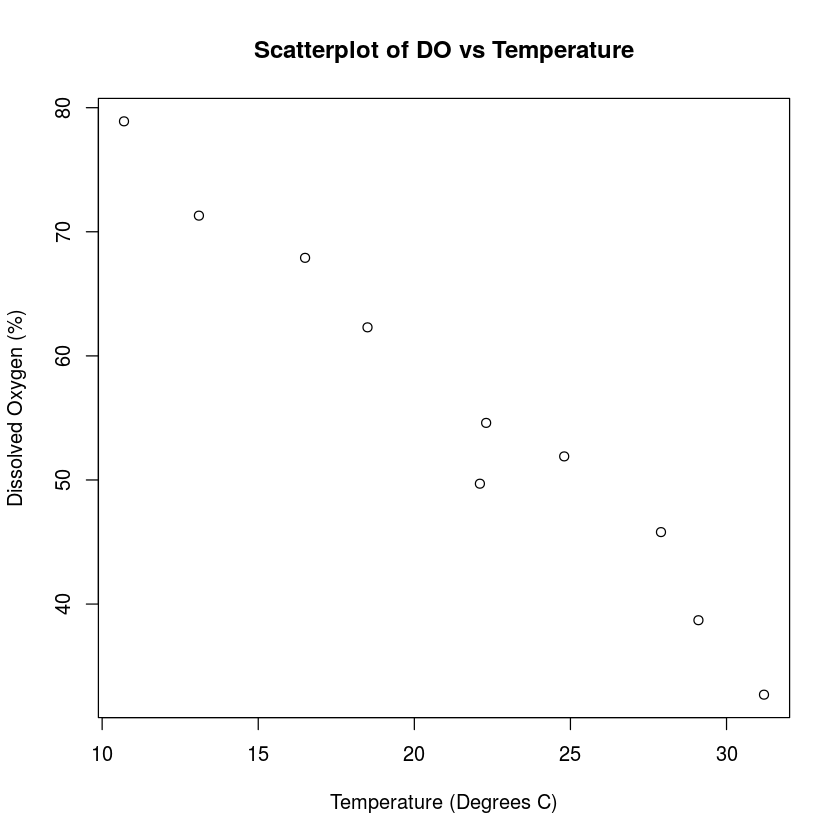

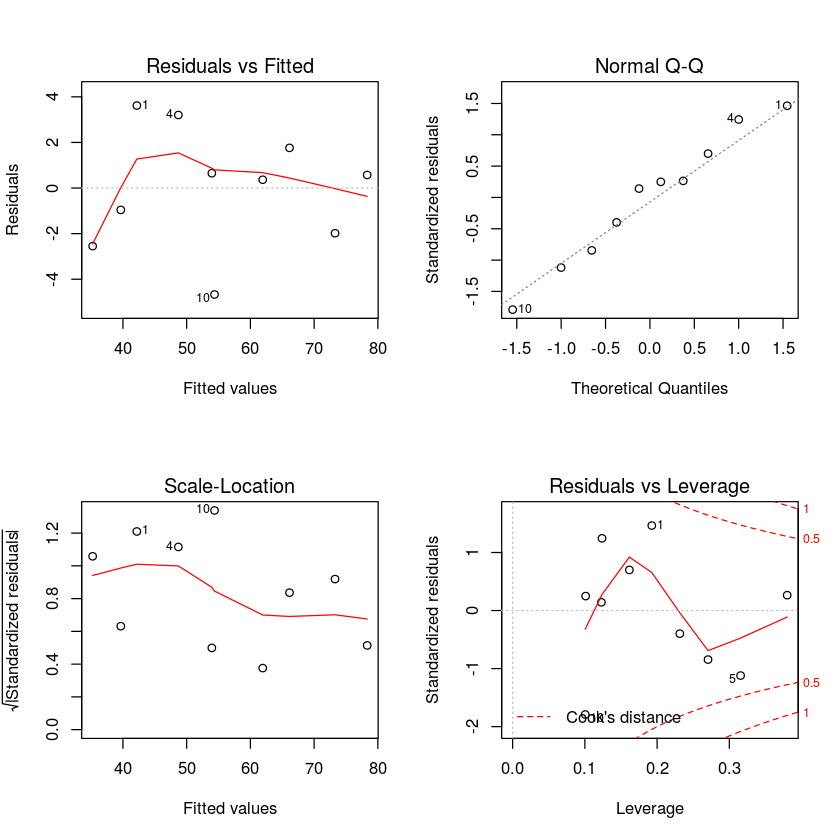

In [48]:
# Enter Data:

DO <- c(45.8,	67.9,	54.6,	51.9,	32.7,	62.3,	71.3,	78.9,	38.7,	49.7)
temp <- c(27.9,	16.5,	22.3,	24.8,	31.2,	18.5,	13.1,	10.7,	29.1,	22.1)

rivers <- data.frame(DO, temp)
rm(DO, temp)

# Plot the Data:

attach(rivers)

plot(temp, DO, xlab = "Temperature (Degrees C)",
     ylab = "Dissolved Oxygen (%)",
     main = "Scatterplot of DO vs Temperature")

detach()

# Fit the model to the data:

do.lm <- lm(DO ~ temp, data = rivers)

anova(do.lm)
summary(do.lm)

# Check model using residual diagnostics:

par(mfrow = c(2, 2))

plot(do.lm)

par(mfrow = c(1, 1))


What is the population regression model?<br><br><br><br><br>
What are the hypotheses?<br><br><br><br><br>
Is the model fit adequate? Explain your answer.<br><br><br><br><br>
What does the R 2 tell us?<br><br><br><br><br>
Is there a significant linear relationship between dissolved oxygen and temperature?<br><br><br><br><br>
What is the fitted regression model?<br><br><br><br><br>
Predict the value of the dependent variable if the independent variable=30. Comment
on this prediction.<br><br><br><br><br>
Predict the value of the dependent variable if the independent variable=9. Comment on
this prediction.<br><br><br><br><br>
Check both of the above predictions in R (see the R script file “Regression Examples –
Dissolved Oxygen.R”) using 95% “wide” prediction intervals.